# PREPARAÇÃO DOS DADOS

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [ ]:
data = pd.read_csv('/content/combined.csv')
pd.set_option('display.max_columns', 50)

In [ ]:
# G: Games*
# GS: Games started*
# MP: Minutes Played*
# PER: Player Efficiency Rating*
# TS%: True Shooting Percentage
# OWS: Offensive Win Shares
# DWS: Defensive Win Shares
# WS: Win Shares*
# BPM: Score estimate of points per 100 possetions*
# FG%: Field Goal percentage
# 2P%: Two point percentage
# 3P%: Three point percentage

In [ ]:
data.head(5)

,Player,careers,Pos,Tm,G,PER,GS,MP,TS,OWS,DWS,WS,BPM,FG,P2,P3,year_start,year_end,height,weight,birth_date,year_active,age_start,age_end,churn
0,A.C. Green,18,PF,MIA,1361,13.9,905,39044,0.5,3.4,2.4,5.8,-0.1,0.5,0.5,0.1,1986,2001,6-9,220,1963,16,23,38,0
1,A.J. English,2,SG,WSB,151,11.6,18,3108,0.5,-0.2,0.7,0.6,-5.1,0.4,0.5,0.1,1991,1992,6-3,175,1967,2,24,25,1
2,A.J. Guyton,3,PG,GSW,80,4.4,14,1246,0.3,0.1,-0.0,0.1,-11.0,0.3,0.3,0.3,2001,2003,6-1,180,1978,3,23,25,1
3,A.J. Hammons,1,C,DAL,22,8.4,0,163,0.5,-0.2,0.2,0.0,-5.6,0.4,0.4,0.5,2017,2017,7-0,260,1992,1,25,25,1
4,A.J. Price,9,PG,PHO,287,10.4,25,4253,0.4,0.1,0.4,0.6,-4.1,0.4,0.4,0.2,2010,2015,6-2,181,1986,6,24,29,0


In [ ]:
data.columns

Index(['Player', 'careers', 'Pos', 'Tm', 'G', 'PER', 'GS', 'MP', 'TS', 'OWS',
       'DWS', 'WS', 'BPM', 'FG', 'P2', 'P3', 'year_start', 'year_end',
       'height', 'weight', 'birth_date', 'year_active', 'age_start', 'age_end',
       'churn'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       2294 non-null   object 
 1   careers      2294 non-null   int64  
 2   Pos          2294 non-null   object 
 3   Tm           2294 non-null   object 
 4   G            2294 non-null   int64  
 5   PER          2294 non-null   float64
 6   GS           2294 non-null   int64  
 7   MP           2294 non-null   int64  
 8   TS           2294 non-null   float64
 9   OWS          2294 non-null   float64
 10  DWS          2294 non-null   float64
 11  WS           2294 non-null   float64
 12  BPM          2294 non-null   float64
 13  FG           2294 non-null   float64
 14  P2           2294 non-null   float64
 15  P3           2294 non-null   float64
 16  year_start   2294 non-null   int64  
 17  year_end     2294 non-null   int64  
 18  height       2294 non-null   object 
 19  weight

In [ ]:
print('linhas/colunas' , data.shape)

linhas/colunas (2294, 25)


In [ ]:
data.columns

Index(['Player', 'careers', 'Pos', 'Tm', 'G', 'PER', 'GS', 'MP', 'TS', 'OWS',
       'DWS', 'WS', 'BPM', 'FG', 'P2', 'P3', 'year_start', 'year_end',
       'height', 'weight', 'birth_date', 'year_active', 'age_start', 'age_end',
       'churn'],
      dtype='object')

In [ ]:
data = data[[
    'Player', 'careers','Pos',
    'Tm', 'G', 'PER',
    'TS', 'OWS',
    'height', 'weight','age_end',
    # 'year_active', 'age_start',
    # 'GS','year_start', 'year_end', 'DWS',
    #  'BPM', 'FG', 'P2', 'P3',
    # 'birth_date','MP',
    'WS','churn'
    ]].copy()

In [ ]:
data.head()

,Player,careers,Pos,Tm,G,PER,TS,OWS,height,weight,age_end,WS,churn
0,A.C. Green,18,PF,MIA,1361,13.9,0.5,3.4,6-9,220,38,5.8,0
1,A.J. English,2,SG,WSB,151,11.6,0.5,-0.2,6-3,175,25,0.6,1
2,A.J. Guyton,3,PG,GSW,80,4.4,0.3,0.1,6-1,180,25,0.1,1
3,A.J. Hammons,1,C,DAL,22,8.4,0.5,-0.2,7-0,260,25,0.0,1
4,A.J. Price,9,PG,PHO,287,10.4,0.4,0.1,6-2,181,29,0.6,0


In [ ]:
data.shape

(2294, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   2294 non-null   object 
 1   careers  2294 non-null   int64  
 2   Pos      2294 non-null   object 
 3   Tm       2294 non-null   object 
 4   G        2294 non-null   int64  
 5   PER      2294 non-null   float64
 6   TS       2294 non-null   float64
 7   OWS      2294 non-null   float64
 8   height   2294 non-null   object 
 9   weight   2294 non-null   int64  
 10  age_end  2294 non-null   int64  
 11  WS       2294 non-null   float64
 12  churn    2294 non-null   int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 233.1+ KB


In [ ]:
data.isnull().sum()

Player     0
careers    0
Pos        0
Tm         0
G          0
PER        0
TS         0
OWS        0
height     0
weight     0
age_end    0
WS         0
churn      0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
novo_data = data.rename(columns={'careers':'Careers',
                          # 'year_start':'Year_Start',
                          # 'year_end':'Year_End',
                          'height':'Height',
                          'weight':'Weigth',
                          'year_active':'Year_Active',
                          'age_start':'Age_Start',
                          'age_end':'Age_End',
                          'churn':'Churn'}).copy()

# DATASET PRONTO

In [ ]:
novo_data.head()

,Player,Careers,Pos,Tm,G,PER,TS,OWS,Height,Weigth,Age_End,WS,Churn
0,A.C. Green,18,PF,MIA,1361,13.9,0.5,3.4,6-9,220,38,5.8,0
1,A.J. English,2,SG,WSB,151,11.6,0.5,-0.2,6-3,175,25,0.6,1
2,A.J. Guyton,3,PG,GSW,80,4.4,0.3,0.1,6-1,180,25,0.1,1
3,A.J. Hammons,1,C,DAL,22,8.4,0.5,-0.2,7-0,260,25,0.0,1
4,A.J. Price,9,PG,PHO,287,10.4,0.4,0.1,6-2,181,29,0.6,0


In [ ]:
novo_data.shape

(2294, 13)

In [ ]:
novo_data.dtypes

Player      object
Careers      int64
Pos         object
Tm          object
G            int64
PER        float64
TS         float64
OWS        float64
Height      object
Weigth       int64
Age_End      int64
WS         float64
Churn        int64
dtype: object

In [ ]:
# Função para converter o formato da altura de polegadas para centímetros
def conversor_altura(height_value):
    if isinstance(height_value, str):
        feet, inches = map(int, height_value.split('-'))
        total_inches = feet * 12 + inches
        total_centimeters = total_inches * 2.54
        return total_centimeters
    else:
        return height_value

# Aplicar a função de conversão à coluna "Height"
novo_data['Height'] = novo_data['Height'].apply(conversor_altura)
print(novo_data.head())

#valores_nao_convertidos = novo_data[novo_data['Height'].isna()]['Height']
# nao há valores nao convertidos
# print(valores_nao_convertidos)

         Player  Careers Pos   Tm     G   PER   TS  OWS  Height  Weigth  \
0    A.C. Green       18  PF  MIA  1361  13.9  0.5  3.4  205.74     220   
1  A.J. English        2  SG  WSB   151  11.6  0.5 -0.2  190.50     175   
2   A.J. Guyton        3  PG  GSW    80   4.4  0.3  0.1  185.42     180   
3  A.J. Hammons        1   C  DAL    22   8.4  0.5 -0.2  213.36     260   
4    A.J. Price        9  PG  PHO   287  10.4  0.4  0.1  187.96     181   

   Age_End   WS  Churn  
0       38  5.8      0  
1       25  0.6      1  
2       25  0.1      1  
3       25  0.0      1  
4       29  0.6      0  


# Teste 1
Analises baseada nos **times**

<ipython-input-21-d46b0b45eb70>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=per_by_team.index, y=per_by_team.values, ci=None, palette='viridis')


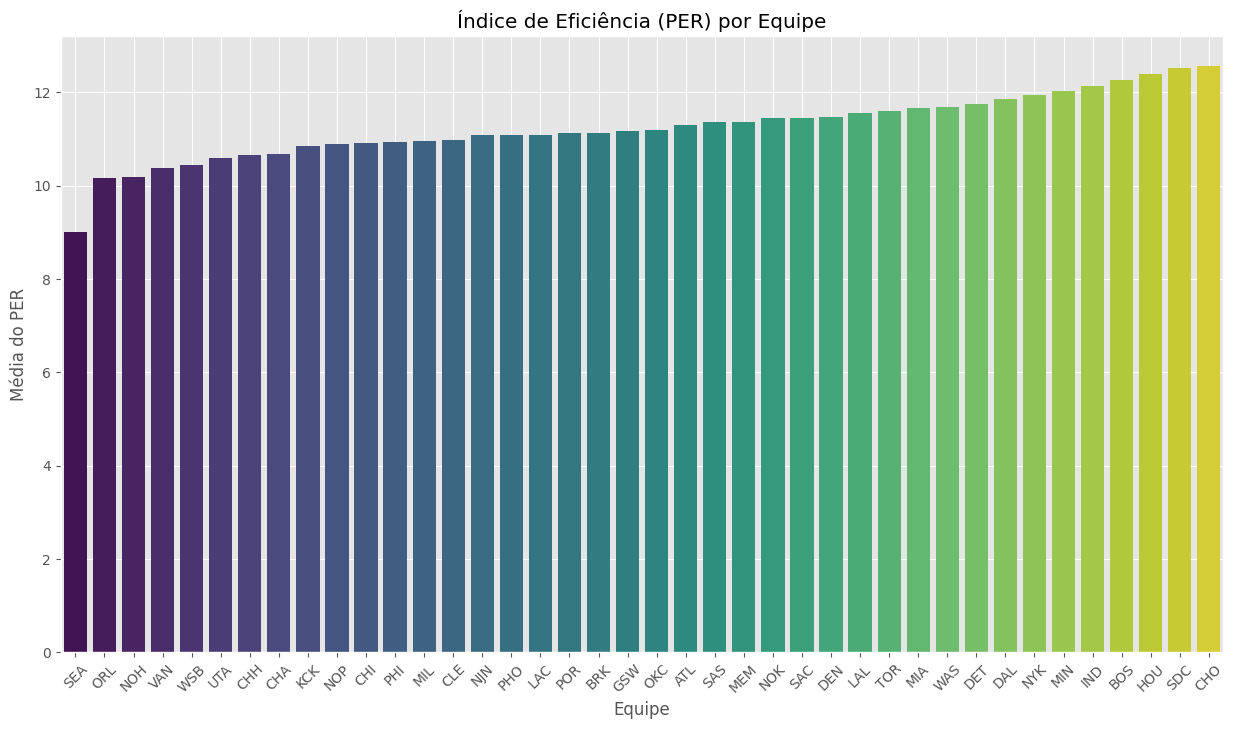

In [ ]:
# Calcular a média do índice de eficiência (PER) por equipe e ordenar em ordem crescente
per_by_team = novo_data.groupby('Tm')['PER'].mean().sort_values()

# Criar uma figura para o gráfico com tamanho personalizado
plt.figure(figsize=(15, 8))

# Criar um gráfico de barras usando Seaborn (sns)
sns.barplot(x=per_by_team.index, y=per_by_team.values, ci=None, palette='viridis')

# Adicionar título ao gráfico
plt.title('Índice de Eficiência (PER) por Equipe')

# Adicionar rótulos aos eixos x e y
plt.xlabel('Equipe')
plt.ylabel('Média do PER')

# Rotacionar rótulos das equipes no eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Adicionar linhas de grade ao gráfico para facilitar a leitura
plt.grid(True)

# Mostrar o gráfico
plt.show()

<ipython-input-22-295040bbbced>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=teams_sorted.index, y=teams_sorted.values, ci=None, palette='viridis')


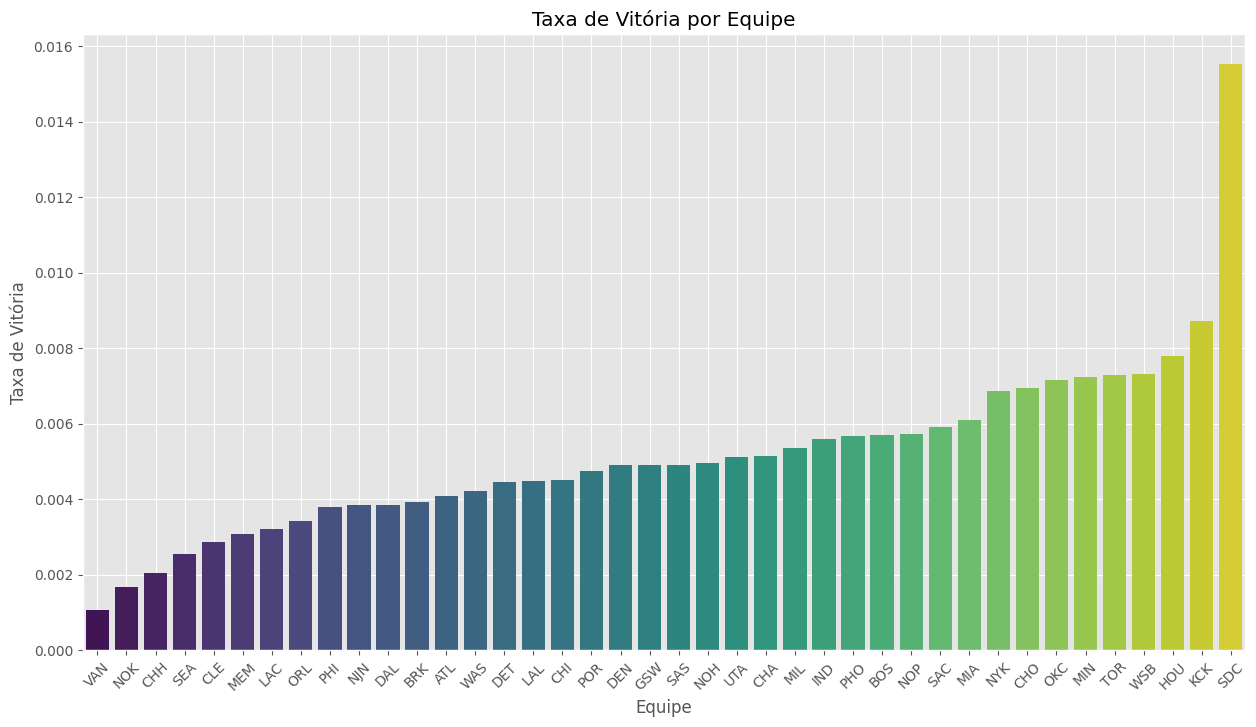

In [ ]:
# Calcular a taxa de vitória para cada equipe, dividindo os Win Shares (WS) pelos jogos (G)
data['Winning_Percentage'] = novo_data['WS'] / novo_data['G']

# Ordenar as equipes de forma crescente com base na taxa de vitória média
teams_sorted = data.groupby('Tm')['Winning_Percentage'].mean().sort_values()

# Criar uma figura para o gráfico com tamanho personalizado
plt.figure(figsize=(15, 8))

# Criar um gráfico de barras usando Seaborn (sns)
sns.barplot(x=teams_sorted.index, y=teams_sorted.values, ci=None, palette='viridis')

# Adicionar título ao gráfico
plt.title('Taxa de Vitória por Equipe')

# Adicionar rótulos aos eixos x e y
plt.xlabel('Equipe')
plt.ylabel('Taxa de Vitória')

# Rotacionar rótulos das equipes no eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Adicionar linhas de grade ao gráfico para facilitar a leitura
plt.grid(True)

# Mostrar o gráfico
plt.show()

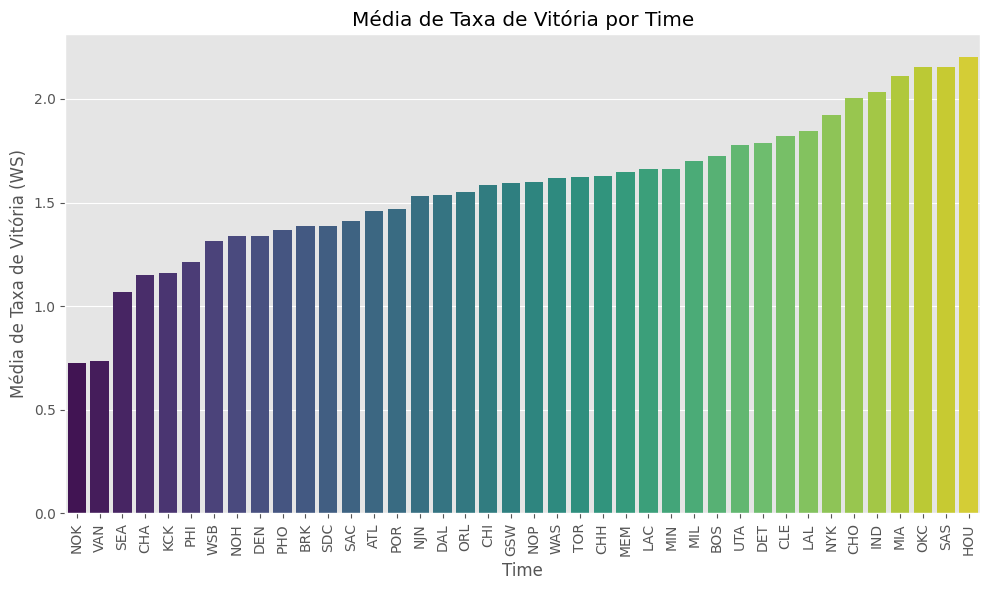

In [ ]:
# Calcular a média da taxa de vitória (Win Shares - WS) por time
media_taxa_vitoria_por_time = novo_data.groupby('Tm')['WS'].mean()

# Ordenar os resultados em ordem crescente pela média da taxa de vitória
media_taxa_vitoria_por_time = media_taxa_vitoria_por_time.sort_values()

# Criar o gráfico de correlação utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=media_taxa_vitoria_por_time.index, y=media_taxa_vitoria_por_time.values, palette='viridis')

# Adicionar título ao gráfico
plt.title('Média de Taxa de Vitória por Time')

# Adicionar rótulos aos eixos x e y
plt.xlabel('Time')
plt.ylabel('Média de Taxa de Vitória (WS)')

# Rotacionar rótulos dos times no eixo x para melhor legibilidade
plt.xticks(rotation=90)

# Ajustar o layout para evitar corte de elementos do gráfico
plt.tight_layout()

# Mostrar o gráfico
plt.show()


<ipython-input-24-1de6970982bd>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=teams_sorted.index, y=teams_sorted.values, ci=None, palette='coolwarm')


Text(0.5, 1.0, 'Porcentagem de Churn por Equipe')

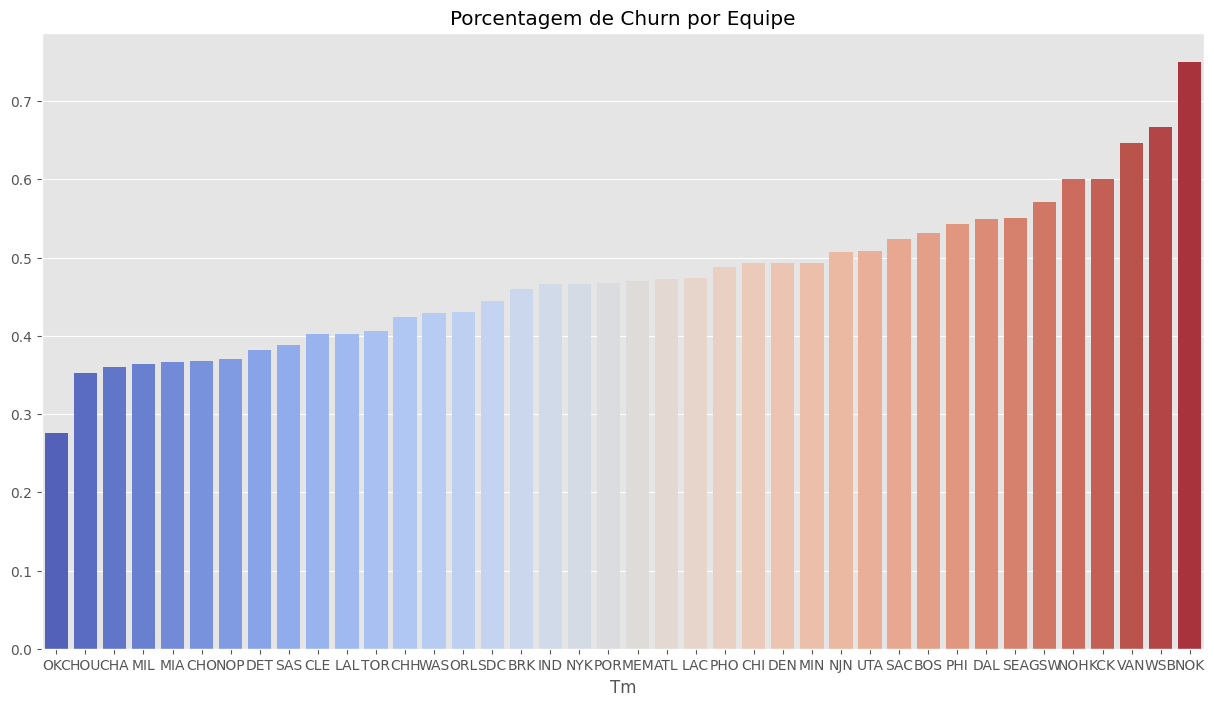

In [ ]:
# Contar a quantidade de churns e não churns para cada equipe
churn_counts = novo_data.groupby(['Tm', 'Churn'])['Churn'].count().unstack().fillna(0)

# Calcular o total de jogadores para cada equipe
churn_counts['Total'] = churn_counts.sum(axis=1)

# Calcular a porcentagem de churn para cada equipe
churn_counts['Churn_Percentage'] = churn_counts[1] / churn_counts['Total']

# Ordenar as equipes de forma crescente com base na porcentagem de churn
teams_sorted = churn_counts['Churn_Percentage'].sort_values()

# Criar um gráfico de barras para a relação entre equipe (Tm) e porcentagem de churn
plt.figure(figsize=(15, 8))
sns.barplot(x=teams_sorted.index, y=teams_sorted.values, ci=None, palette='coolwarm')

# Adicionar título ao gráfico
plt.title('Porcentagem de Churn por Equipe')


In [ ]:
# Agrupar os dados por time e calcular a média de idade, altura, peso, PER e taxa de churn
media_por_time = novo_data.groupby('Tm')[['Age_End', 'Height', 'Weigth', 'PER']].mean()

# Calcular a média da taxa de vitória por time
media_taxa_vitoria_por_time = novo_data.groupby('Tm')['WS'].mean()

# Calcular a taxa de churn por time
taxa_churn_por_time = novo_data.groupby('Tm')['Churn'].mean()

# Adicionar a média da taxa de vitória e a taxa de churn à tabela de médias por time
media_por_time['Media_Taxa_Vitoria'] = media_taxa_vitoria_por_time
media_por_time['Taxa_Churn'] = taxa_churn_por_time

# Ordenar os resultados em ordem decrescente pela taxa de vitória
media_por_time = media_por_time.sort_values(by='Media_Taxa_Vitoria', ascending=False)

# Exibir a média de idade, altura, peso, PER, taxa de vitória e taxa de churn com 3 casas decimais
media_por_time = media_por_time.round(3)

print(media_por_time)



     Age_End   Height   Weigth     PER  Media_Taxa_Vitoria  Taxa_Churn
Tm                                                                    
HOU   30.456  197.336  206.441  12.387               2.201       0.353
SAS   30.681  198.755  208.028  11.360               2.156       0.389
OKC   29.552  199.434  219.483  11.203               2.152       0.276
MIA   30.296  201.375  214.972  11.675               2.110       0.366
IND   29.250  200.618  214.700  12.143               2.033       0.467
CHO   27.895  198.521  210.211  12.574               2.005       0.368
NYK   29.373  201.405  213.080  11.953               1.924       0.467
LAL   29.625  200.272  212.889  11.550               1.846       0.403
CLE   30.023  198.032  209.908  10.979               1.821       0.402
DET   29.618  198.755  214.088  11.756               1.788       0.382
UTA   29.079  201.023  215.730  10.602               1.779       0.508
BOS   28.835  198.313  213.076  12.272               1.727       0.532
MIL   

# Teste 2
analise baseada nas posições

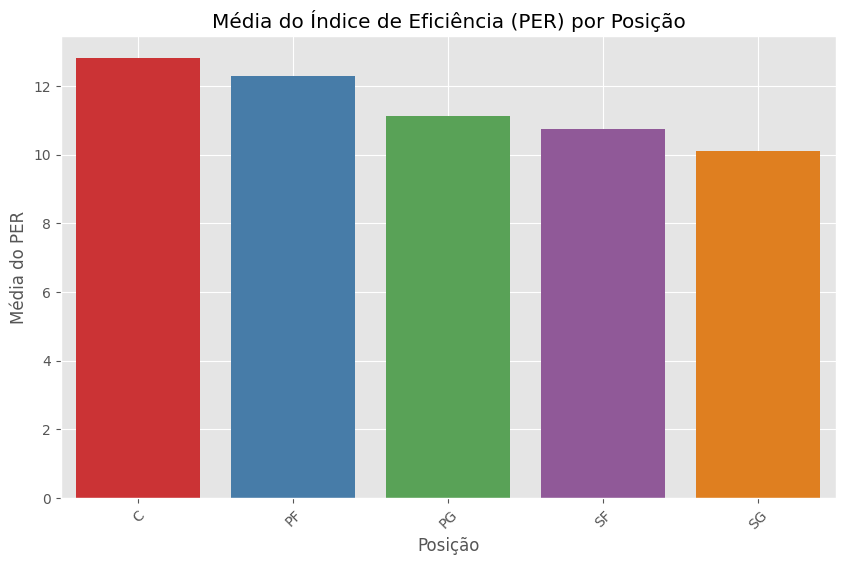

In [ ]:
# Calcula a média do PER para cada posição dos jogadores
per_by_position = novo_data.groupby('Pos')['PER'].mean()

# Cria uma figura para o gráfico de barras
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras utilizando a média do PER por posição
sns.barplot(x=per_by_position.index, y=per_by_position.values, palette='Set1')

# Configuração do título do gráfico, rótulos dos eixos, rotação dos rótulos e linhas de grade
plt.title('Média do Índice de Eficiência (PER) por Posição')
plt.xlabel('Posição')
plt.ylabel('Média do PER')
plt.xticks(rotation=45)
plt.grid(True)

# Mostra o gráfico
plt.show()


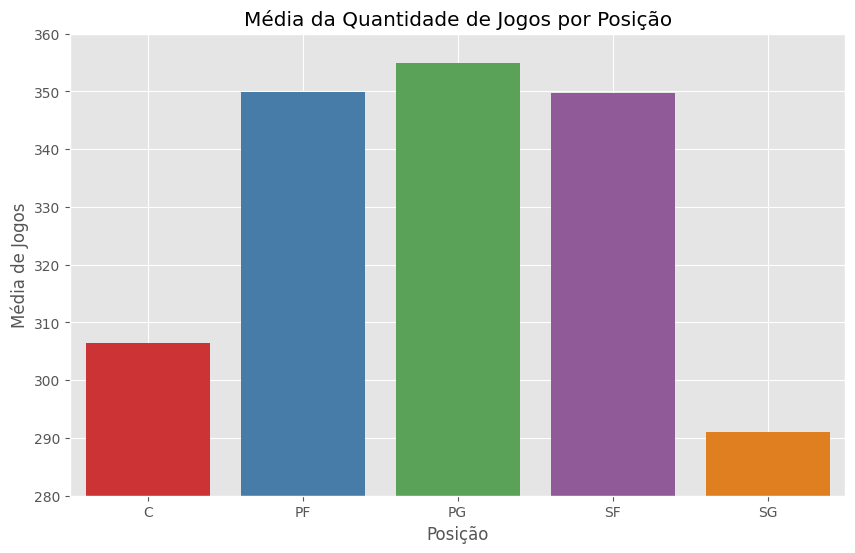

In [ ]:
# Agrupa os dados por posição e calcula a média da quantidade de jogos
media_jogos_por_pos = novo_data.groupby('Pos')['G'].mean()

# Define a ordem das posições
ordem_pos = ['C', 'PF', 'PG', 'SF', 'SG']

# Filtra os dados para incluir apenas as posições presentes na ordem definida
media_jogos_por_pos = media_jogos_por_pos[ordem_pos]

# Cria uma figura para o gráfico de barras
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras utilizando a média de jogos por posição
sns.barplot(x=media_jogos_por_pos.index, y=media_jogos_por_pos.values, palette='Set1')

# Configuração do título do gráfico, rótulos dos eixos, intervalo do eixo Y e linhas de grade
plt.title('Média da Quantidade de Jogos por Posição')
plt.xlabel('Posição')
plt.ylabel('Média de Jogos')
plt.ylim(280, 360)
plt.grid(True)

# Mostra o gráfico
plt.show()



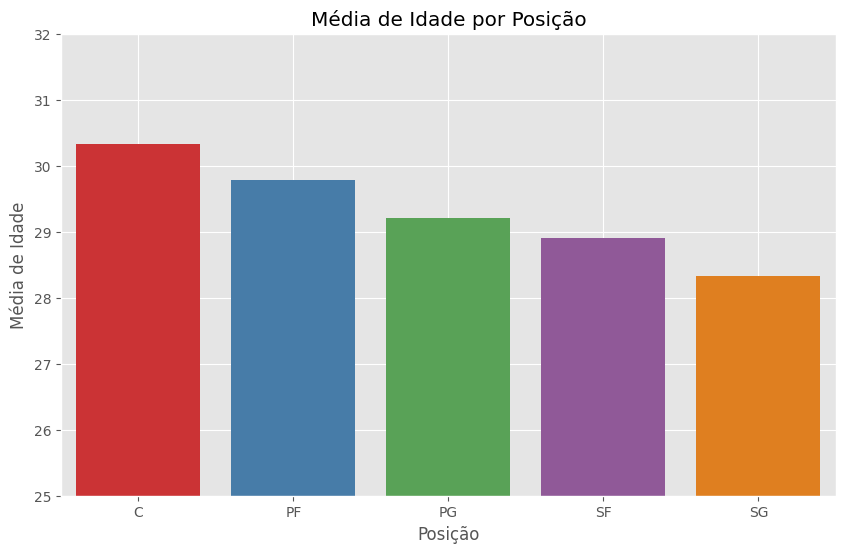

In [ ]:
# Lista das posições desejadas na ordem específica
pos_order = ['C', 'PF', 'PG', 'SF', 'SG']

# Filtra os dados para incluir apenas as posições desejadas
filtered_data = novo_data[novo_data['Pos'].isin(pos_order)]

# Agrupa os dados filtrados por posição e calcula a média da idade final
media_idade_por_pos = filtered_data.groupby('Pos')['Age_End'].mean()

# Cria uma figura para o gráfico de barras
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras utilizando a média de idade por posição
sns.barplot(x=media_idade_por_pos.index, y=media_idade_por_pos.values, order=pos_order, palette='Set1')

# Configuração do título do gráfico, rótulos dos eixos, intervalo do eixo Y e linhas de grade
plt.title('Média de Idade por Posição')
plt.xlabel('Posição')
plt.ylabel('Média de Idade')
plt.ylim(25, 32)
plt.grid(True)

# Mostra o gráfico
plt.show()

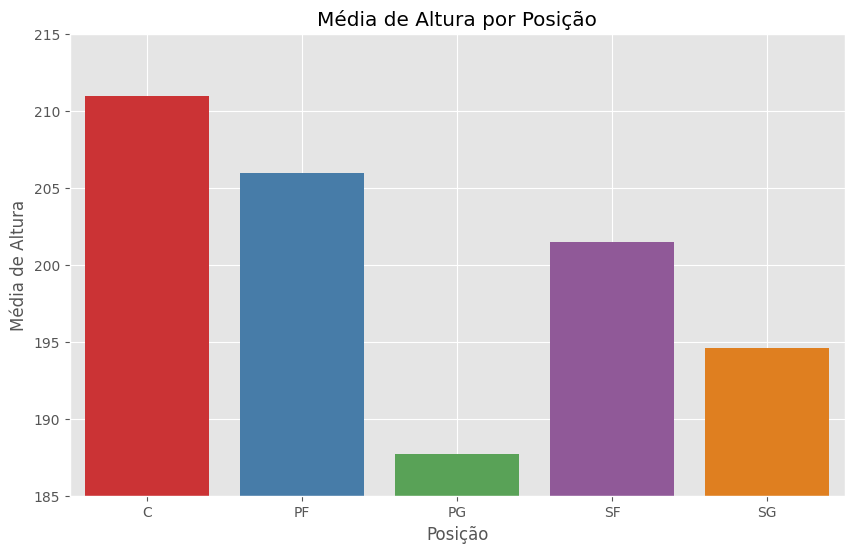

In [ ]:
# Lista das posições desejadas na ordem específica
pos_order = ['C', 'PF', 'PG', 'SF', 'SG']

# Filtra os dados para incluir apenas as posições desejadas
filtered_data = novo_data[novo_data['Pos'].isin(pos_order)]

# Agrupa os dados filtrados por posição e calcula a média da altura
media_altura_por_pos = filtered_data.groupby('Pos')['Height'].mean()

# Cria uma figura para o gráfico de barras
plt.figure(figsize=(10, 6))

# Cria o gráfico de barras utilizando a média de altura por posição
sns.barplot(x=media_altura_por_pos.index, y=media_altura_por_pos.values, order=pos_order, palette='Set1')

# Configuração do título do gráfico, rótulos dos eixos, intervalo do eixo Y e linhas de grade
plt.title('Média de Altura por Posição')
plt.xlabel('Posição')
plt.ylabel('Média de Altura')
plt.ylim(185, 215)
plt.grid(True)

# Mostra o gráfico
plt.show()



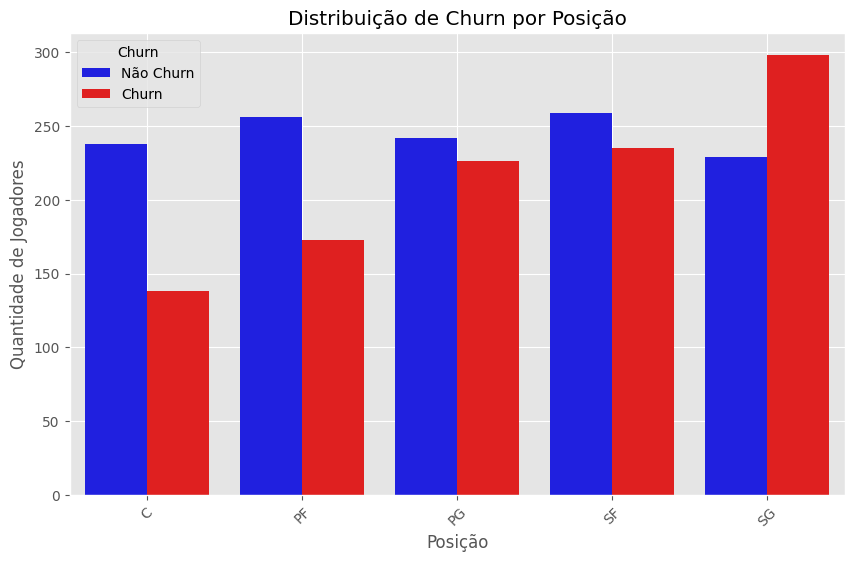

In [ ]:
# Definindo a ordem das posições para garantir a disposição correta no gráfico
order = ['C', 'PF', 'PG', 'SF', 'SG']

# Criação da figura para o gráfico de barras
plt.figure(figsize=(10, 6))

# Criação do gráfico de barras utilizando um countplot para a relação entre churn e posição
sns.countplot(data=novo_data, x='Pos', hue='Churn', palette={0: 'blue', 1: 'red'}, order=order)

# Configuração do título do gráfico, rótulos dos eixos, legenda, rotação dos rótulos e linhas de grade
plt.title('Distribuição de Churn por Posição')
plt.xlabel('Posição')
plt.ylabel('Quantidade de Jogadores')
plt.legend(title='Churn', labels=['Não Churn', 'Churn'])
plt.xticks(rotation=45)
plt.grid(True)

# Mostra o gráfico
plt.show()


# Teste 3
Correlação entre G/PER/Churn

Correlação entre G/TS/Churn

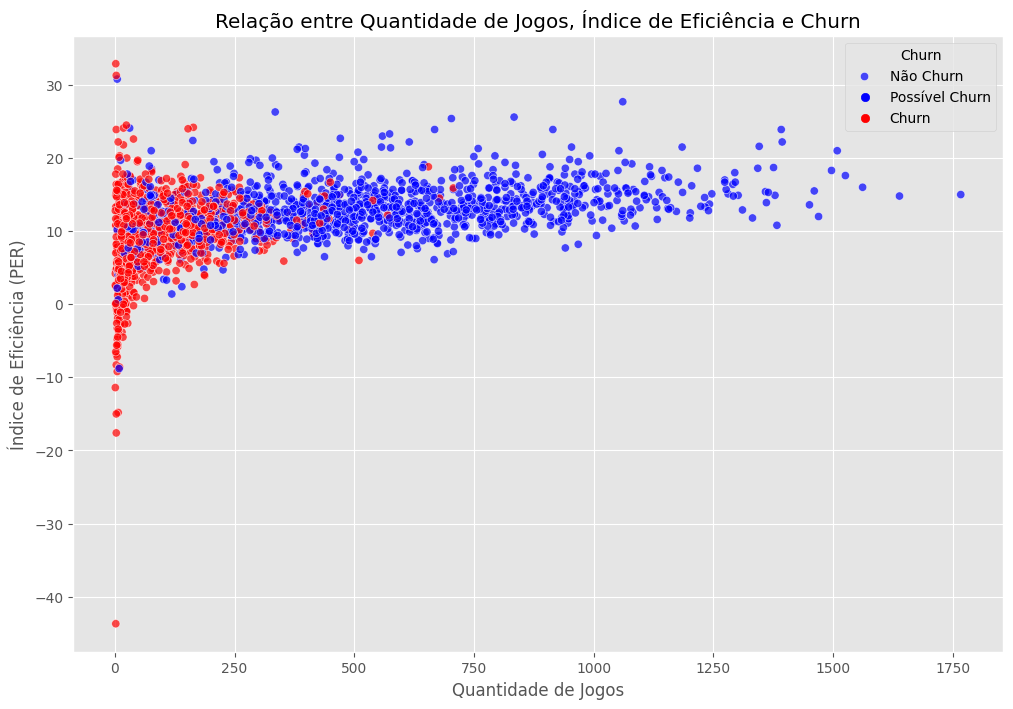

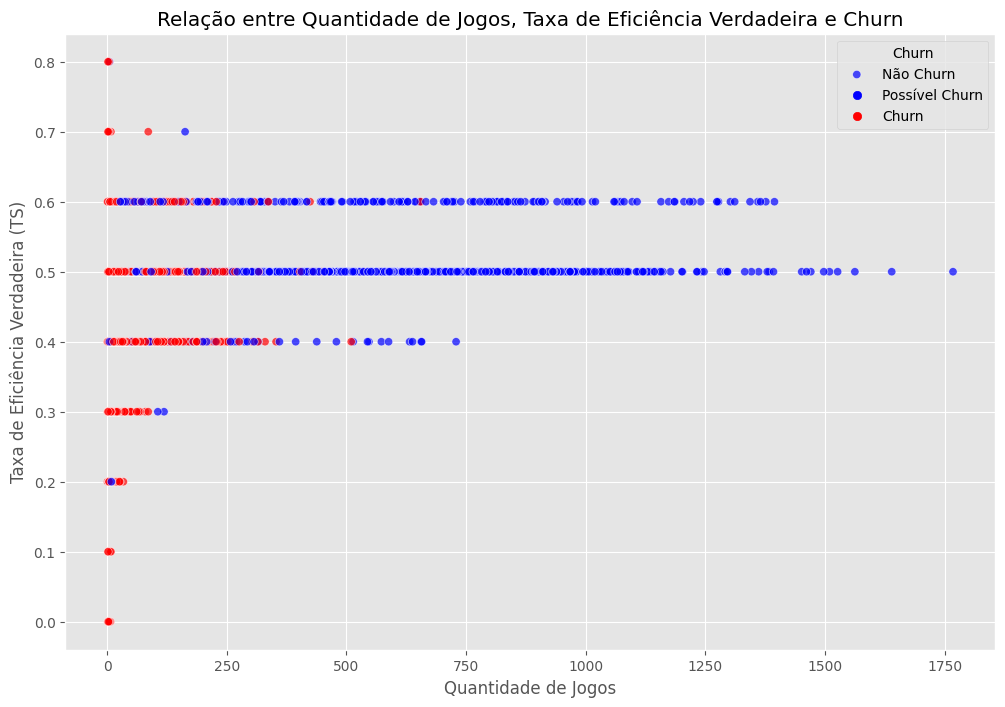

In [ ]:
# Definir paleta de cores
palette = {0: 'blue', 1:'red'}

# Plotar gráfico de dispersão entre G, PER e churn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=novo_data, x='G', y='PER', hue='Churn', palette=palette, marker='o', alpha=0.7)
plt.title('Relação entre Quantidade de Jogos, Índice de Eficiência e Churn')
plt.xlabel('Quantidade de Jogos')
plt.ylabel('Índice de Eficiência (PER)')
plt.legend(title='Churn', labels=['Não Churn', 'Possível Churn', 'Churn'])
plt.grid(True)
plt.show()

# Plotar gráfico de dispersão entre G, TS e churn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=novo_data, x='G', y='TS', hue='Churn', palette=palette, marker='o', alpha=0.7)
plt.title('Relação entre Quantidade de Jogos, Taxa de Eficiência Verdadeira e Churn')
plt.xlabel('Quantidade de Jogos')
plt.ylabel('Taxa de Eficiência Verdadeira (TS)')
plt.legend(title='Churn', labels=['Não Churn', 'Possível Churn', 'Churn'])
plt.grid(True)
plt.show()



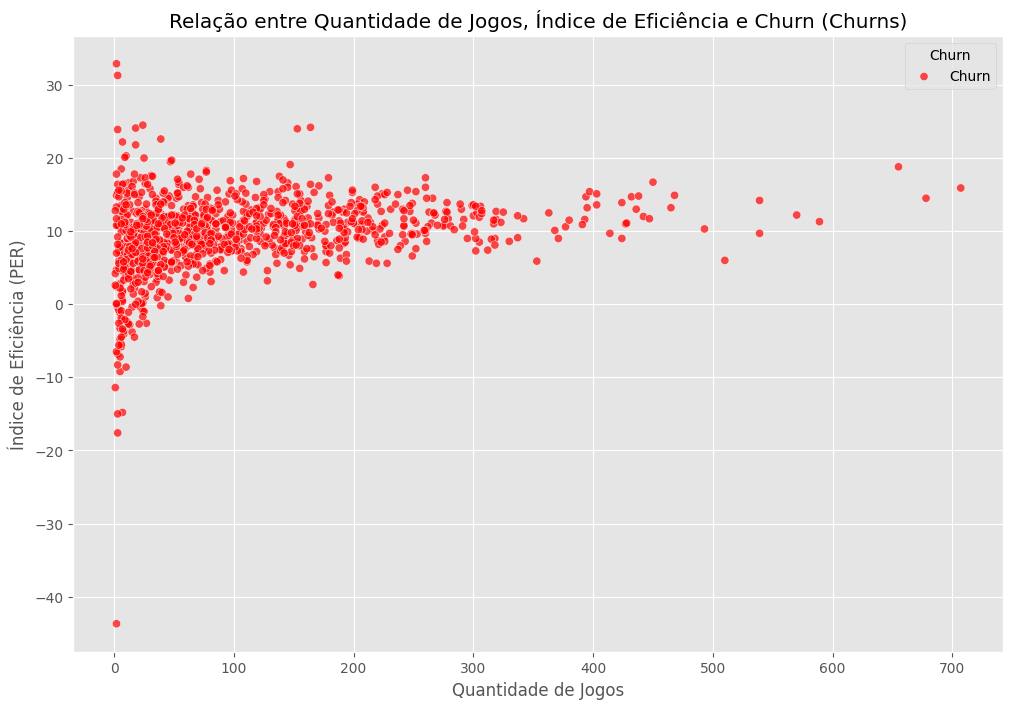

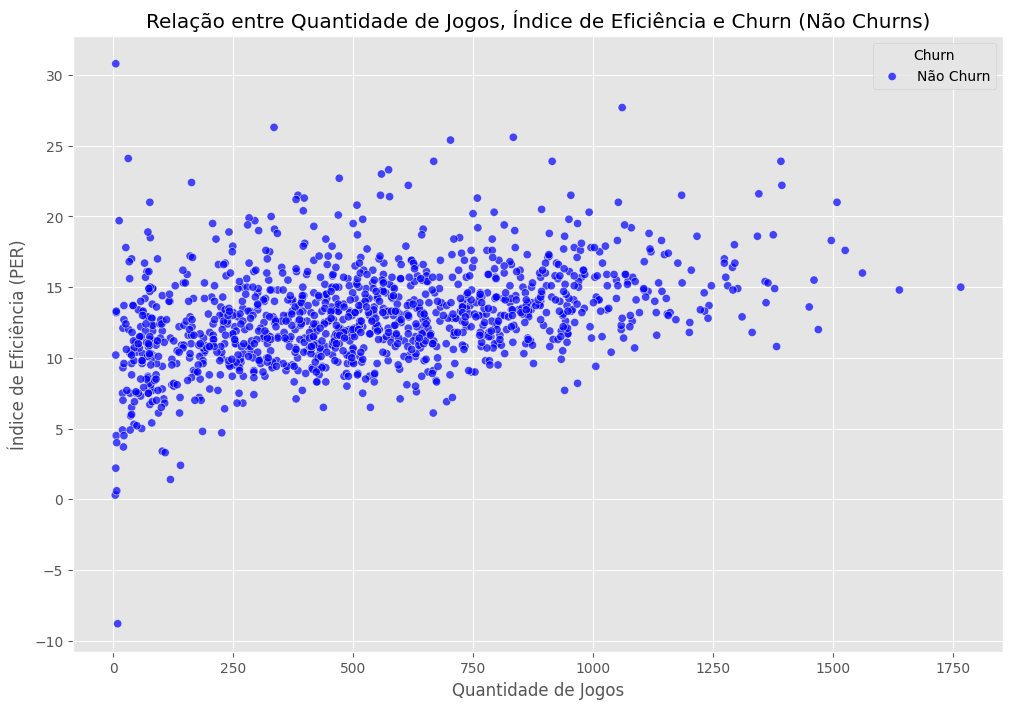

In [ ]:
# Definir paleta de cores
palette = {0: 'blue', 1:'red'}

# Filtrar os dados para churns e não churns
churn_data = novo_data[novo_data['Churn'] == 1]
no_churn_data = novo_data[novo_data['Churn'] == 0]

# Plotar gráfico de dispersão entre G, PER e Churn para churns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=churn_data, x='G', y='PER', hue='Churn', palette=palette, marker='o', alpha=0.7)
plt.title('Relação entre Quantidade de Jogos, Índice de Eficiência e Churn (Churns)')
plt.xlabel('Quantidade de Jogos')
plt.ylabel('Índice de Eficiência (PER)')
plt.legend(title='Churn', labels=['Churn'])
plt.grid(True)
plt.show()

# Plotar gráfico de dispersão entre G, PER e Churn para não churns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=no_churn_data, x='G', y='PER', hue='Churn', palette=palette, marker='o', alpha=0.7)
plt.title('Relação entre Quantidade de Jogos, Índice de Eficiência e Churn (Não Churns)')
plt.xlabel('Quantidade de Jogos')
plt.ylabel('Índice de Eficiência (PER)')
plt.legend(title='Churn', labels=['Não Churn'])
plt.grid(True)
plt.show()


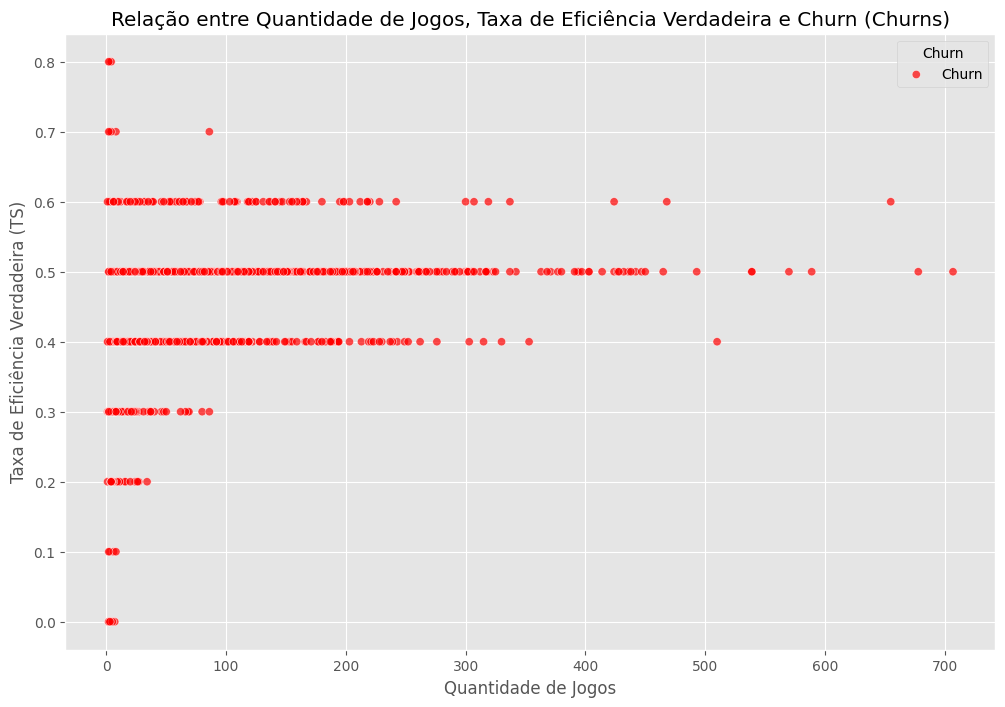

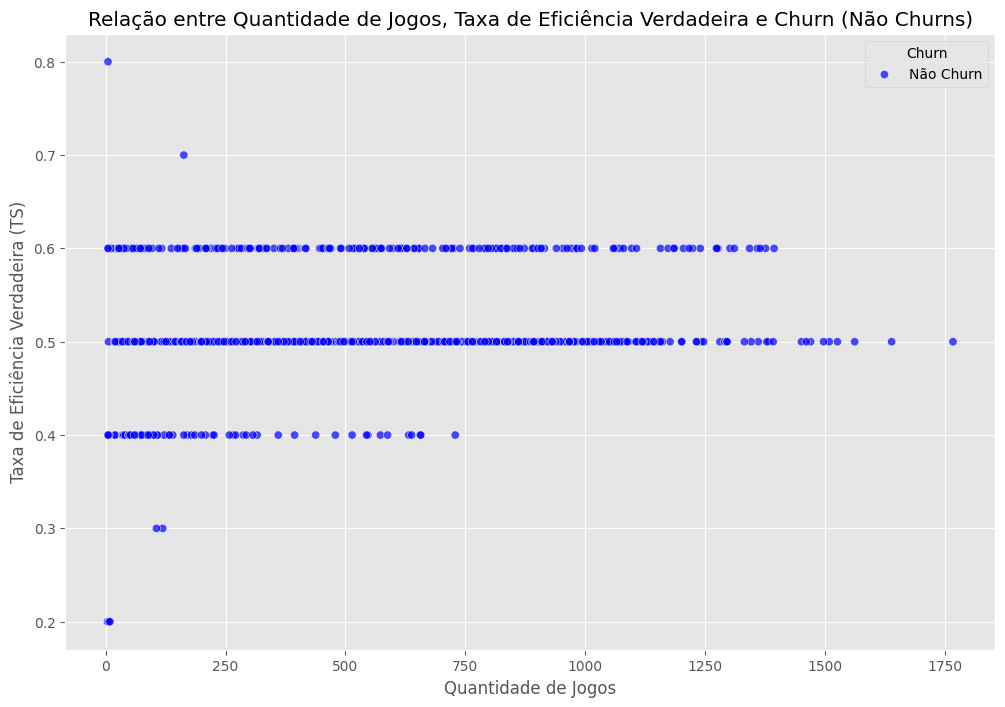

In [ ]:
# Definir paleta de cores
palette = {0: 'blue', 1:'red'}

# Filtrar os dados para churns e não churns
churn_data = novo_data[novo_data['Churn'] == 1]
no_churn_data = novo_data[novo_data['Churn'] == 0]

# Plotar gráfico de dispersão entre G, TS e Churn para churns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=churn_data, x='G', y='TS', hue='Churn', palette=palette, marker='o', alpha=0.7)
plt.title('Relação entre Quantidade de Jogos, Taxa de Eficiência Verdadeira e Churn (Churns)')
plt.xlabel('Quantidade de Jogos')
plt.ylabel('Taxa de Eficiência Verdadeira (TS)')
plt.legend(title='Churn', labels=['Churn'])
plt.grid(True)
plt.show()

# Plotar gráfico de dispersão entre G, TS e Churn para não churns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=no_churn_data, x='G', y='TS', hue='Churn', palette=palette, marker='o', alpha=0.7)
plt.title('Relação entre Quantidade de Jogos, Taxa de Eficiência Verdadeira e Churn (Não Churns)')
plt.xlabel('Quantidade de Jogos')
plt.ylabel('Taxa de Eficiência Verdadeira (TS)')
plt.legend(title='Churn', labels=['Não Churn'])
plt.grid(True)
plt.show()


# Teste 4
Correlação entre idade/PER/Churn

Correlação entre idade/TS/Churn

Correlação entre idade/PER/Pos/Churn

Correlação entre idade/TS/Pos/Churn


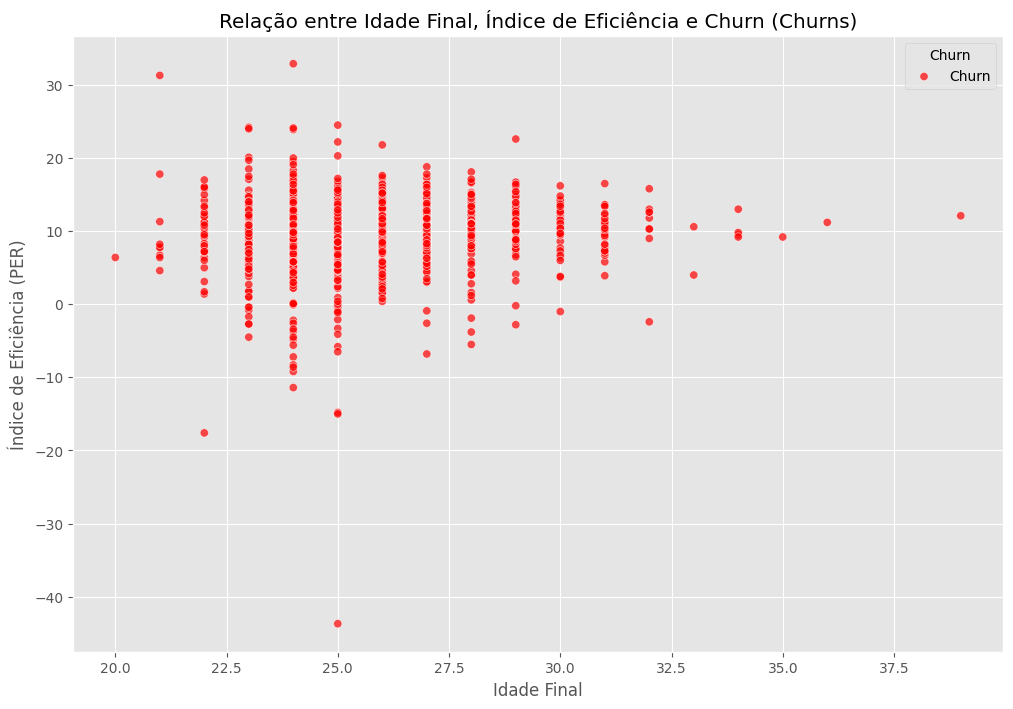

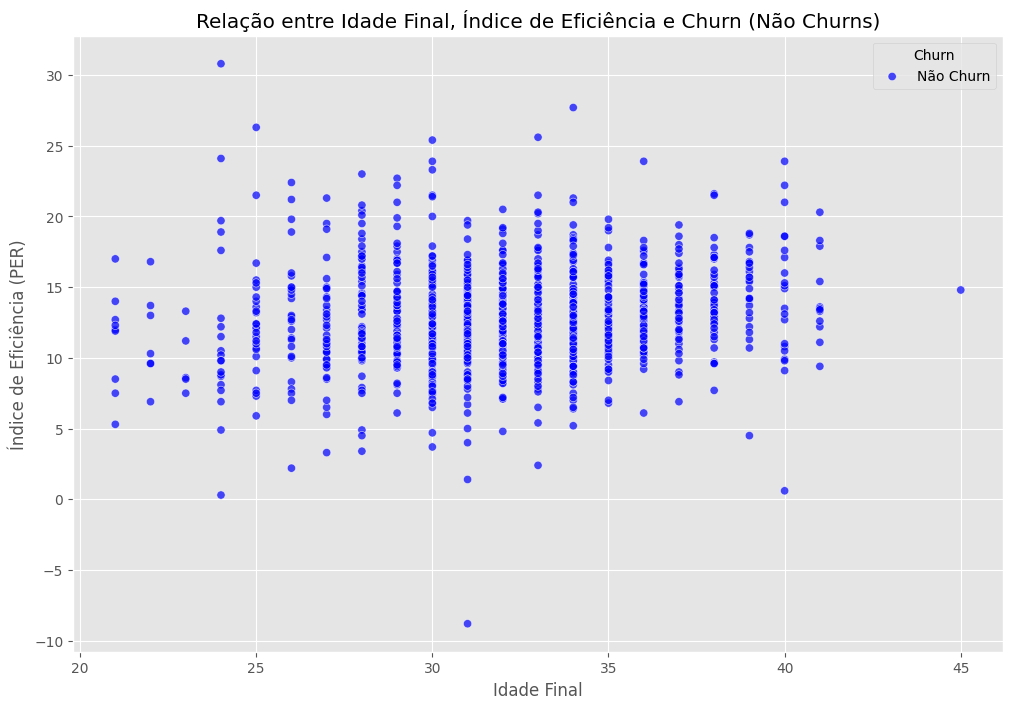

In [ ]:
# Definir paleta de cores
palette = {0: 'blue', 1: 'red'}

# Filtrar os dados para churns e não churns
churn_data = novo_data[novo_data['Churn'] == 1]
no_churn_data = novo_data[novo_data['Churn'] == 0]

# Plotar gráfico de dispersão entre Age_End, PER e Churn para churns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=churn_data, x='Age_End', y='PER', hue='Churn', palette=palette, marker='o', alpha=0.7)
plt.title('Relação entre Idade Final, Índice de Eficiência e Churn (Churns)')
plt.xlabel('Idade Final')
plt.ylabel('Índice de Eficiência (PER)')
plt.legend(title='Churn', labels=['Churn'])
plt.grid(True)
plt.show()

# Plotar gráfico de dispersão entre Age_End, PER e Churn para não churns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=no_churn_data, x='Age_End', y='PER', hue='Churn', palette=palette, marker='o', alpha=0.7)
plt.title('Relação entre Idade Final, Índice de Eficiência e Churn (Não Churns)')
plt.xlabel('Idade Final')
plt.ylabel('Índice de Eficiência (PER)')
plt.legend(title='Churn', labels=['Não Churn'])
plt.grid(True)
plt.show()


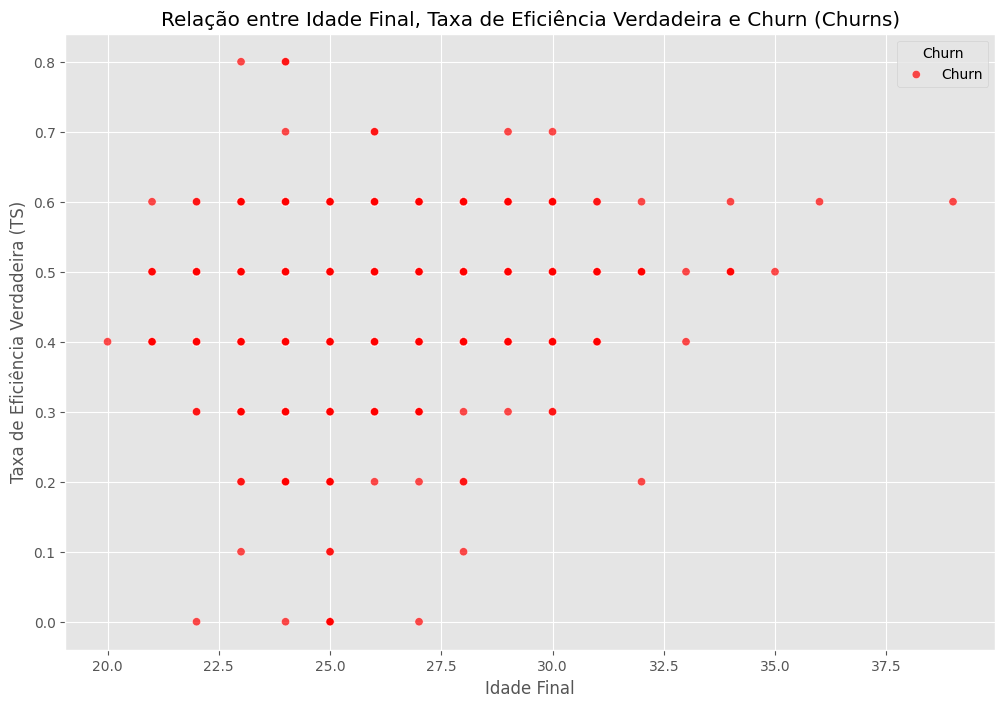

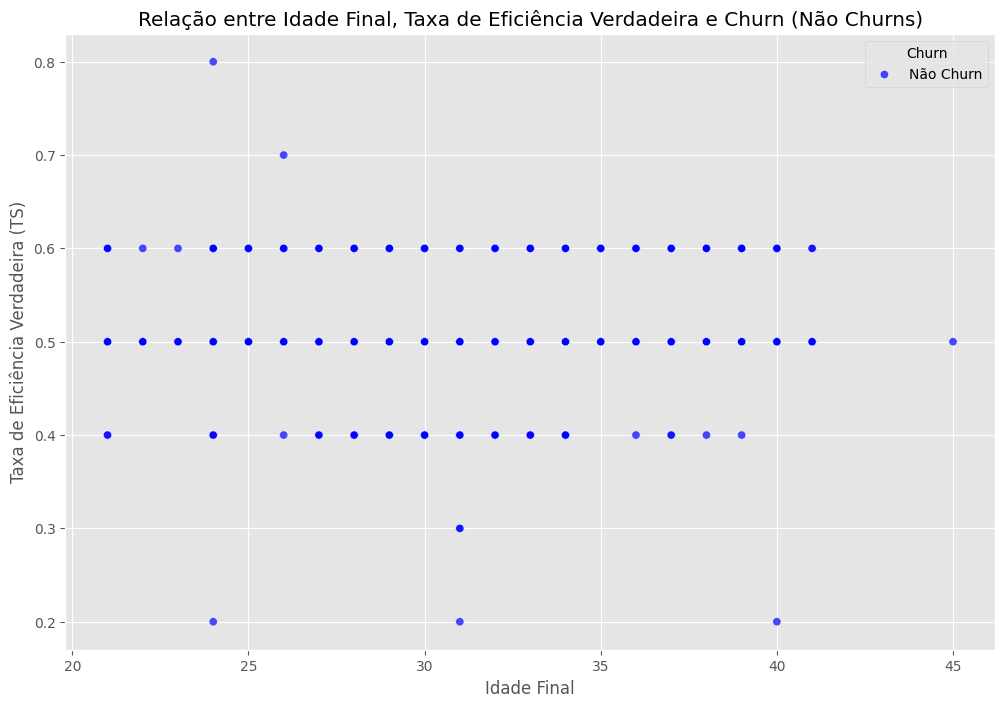

In [ ]:
# Definir paleta de cores
palette = {0: 'blue', 1: 'red'}

# Filtrar os dados para churns e não churns
churn_data = novo_data[novo_data['Churn'] == 1]
no_churn_data = novo_data[novo_data['Churn'] == 0]

# Plotar gráfico de dispersão entre Age_End, TS e Churn para churns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=churn_data, x='Age_End', y='TS', hue='Churn', palette=palette, marker='o', alpha=0.7)
plt.title('Relação entre Idade Final, Taxa de Eficiência Verdadeira e Churn (Churns)')
plt.xlabel('Idade Final')
plt.ylabel('Taxa de Eficiência Verdadeira (TS)')
plt.legend(title='Churn', labels=['Churn'])
plt.grid(True)
plt.show()

# Plotar gráfico de dispersão entre Age_End, TS e Churn para não churns
plt.figure(figsize=(12, 8))
sns.scatterplot(data=no_churn_data, x='Age_End', y='TS', hue='Churn', palette=palette, marker='o', alpha=0.7)
plt.title('Relação entre Idade Final, Taxa de Eficiência Verdadeira e Churn (Não Churns)')
plt.xlabel('Idade Final')
plt.ylabel('Taxa de Eficiência Verdadeira (TS)')
plt.legend(title='Churn', labels=['Não Churn'])
plt.grid(True)
plt.show()


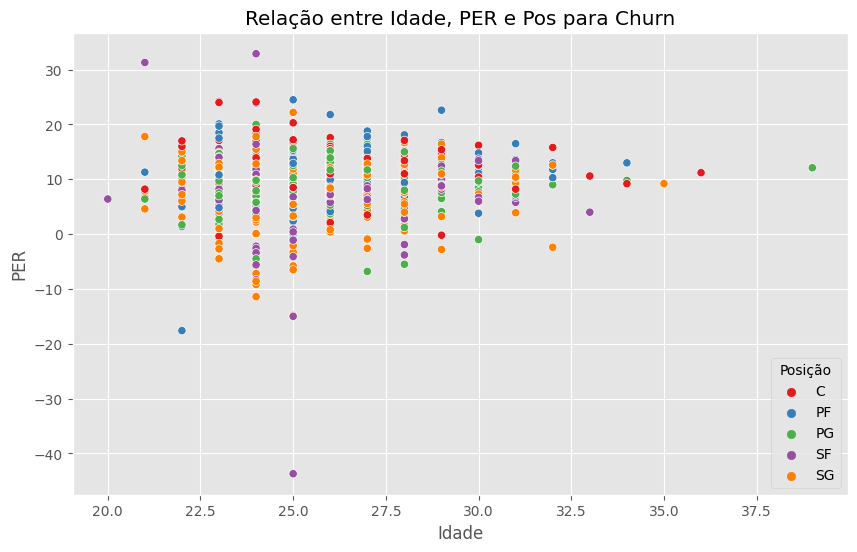

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=churn_data, x='Age_End', y='PER', hue='Pos', palette='Set1', hue_order=['C', 'PF', 'PG', 'SF', 'SG'])
plt.title('Relação entre Idade, PER e Pos para Churn')
plt.xlabel('Idade')
plt.ylabel('PER')
plt.legend(title='Posição', loc = 'lower right')
plt.show()


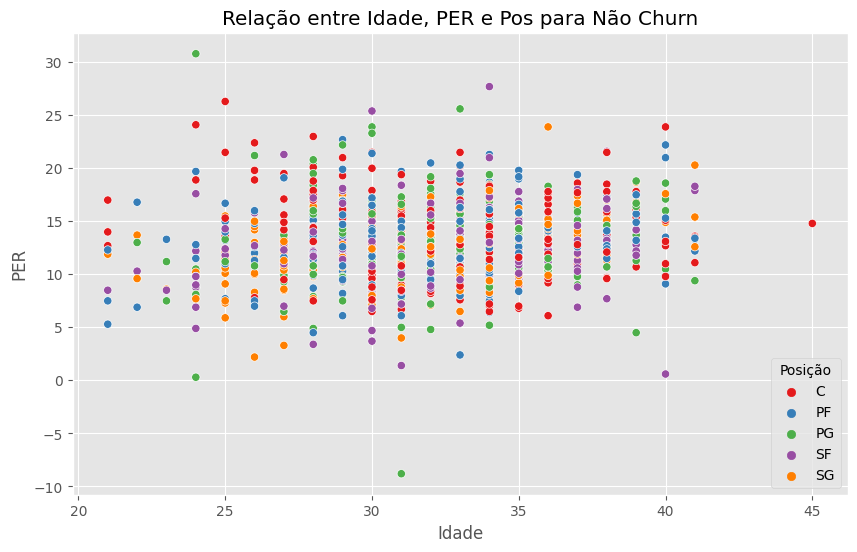

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=no_churn_data, x='Age_End', y='PER', hue='Pos', palette='Set1', hue_order=['C', 'PF', 'PG', 'SF', 'SG'])
plt.title('Relação entre Idade, PER e Pos para Não Churn')
plt.xlabel('Idade')
plt.ylabel('PER')
plt.legend(title='Posição', loc = 'lower right')
plt.show()


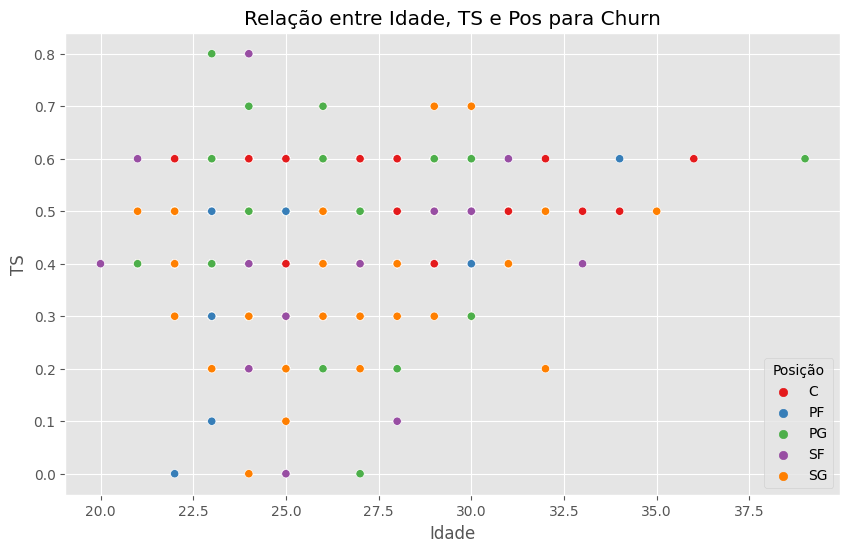

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=churn_data, x='Age_End', y='TS', hue='Pos', palette='Set1', hue_order=['C', 'PF', 'PG', 'SF', 'SG'])
plt.title('Relação entre Idade, TS e Pos para Churn')
plt.xlabel('Idade')
plt.ylabel('TS')
plt.legend(title='Posição', loc='lower right')
plt.show()


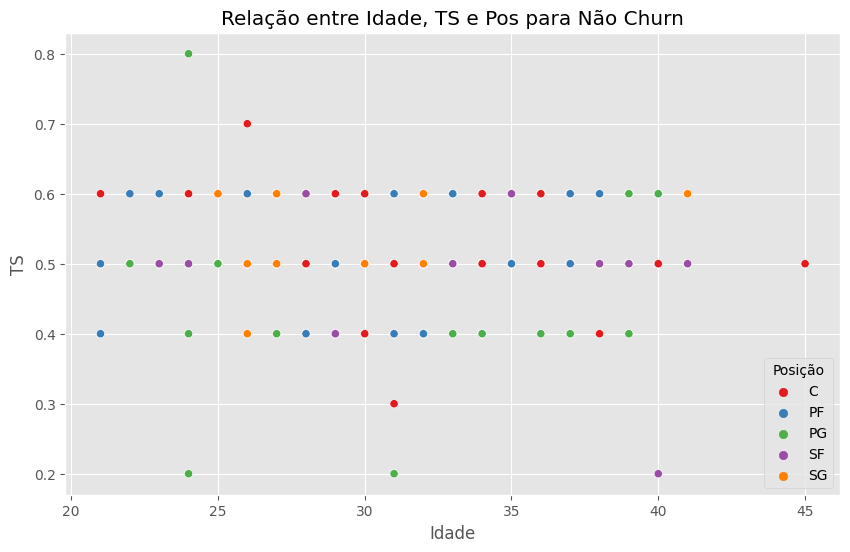

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=no_churn_data, x='Age_End', y='TS', hue='Pos', palette='Set1', hue_order=['C', 'PF', 'PG', 'SF', 'SG'])
plt.title('Relação entre Idade, TS e Pos para Não Churn')
plt.xlabel('Idade')
plt.ylabel('TS')
plt.legend(title='Posição', loc = 'lower right')
plt.show()


#CONCLUSÕES FINAIS

<ipython-input-40-e90e2fe53c78>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=churn_data, x='Pos', y='PER', order=pos_order, palette='Set1', ci=None)


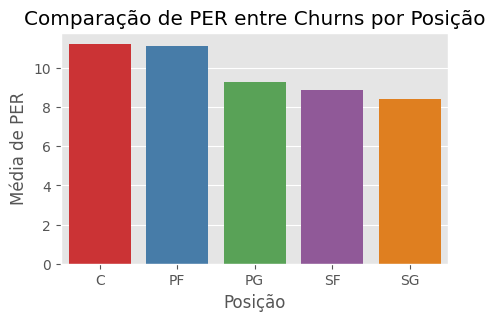

<ipython-input-40-e90e2fe53c78>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=no_churn_data, x='Pos', y='PER', order=pos_order, palette='Set1', ci=None)


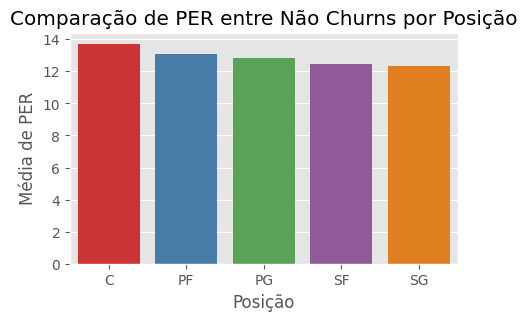

In [ ]:
# Definir a ordem das posições
pos_order = ['C', 'PF', 'PG', 'SF', 'SG']

# Filtrar os dados para churns e não churns
churn_data = novo_data[novo_data['Churn'] == 1]
no_churn_data = novo_data[novo_data['Churn'] == 0]

# Criar gráfico de barras para comparar o PER entre churns e não churns
plt.figure(figsize=(5, 3))
sns.barplot(data=churn_data, x='Pos', y='PER', order=pos_order, palette='Set1', ci=None)
plt.title('Comparação de PER entre Churns por Posição')
plt.xlabel('Posição')
plt.ylabel('Média de PER')
plt.show()

plt.figure(figsize=(5, 3))
sns.barplot(data=no_churn_data, x='Pos', y='PER', order=pos_order, palette='Set1', ci=None)
plt.title('Comparação de PER entre Não Churns por Posição')
plt.xlabel('Posição')
plt.ylabel('Média de PER')
plt.show()


<ipython-input-41-7bf9cfc82c99>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=churn_data, x='Pos', y='WS', order=pos_order, palette='Set1', ci=None)


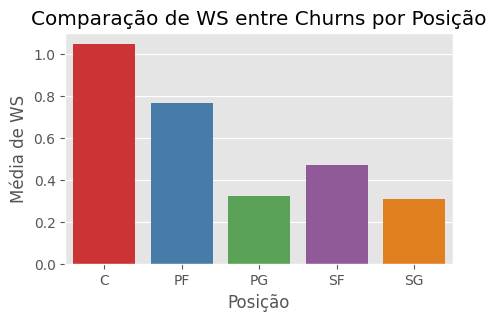

<ipython-input-41-7bf9cfc82c99>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=no_churn_data, x='Pos', y='WS', order=pos_order, palette='Set1', ci=None)


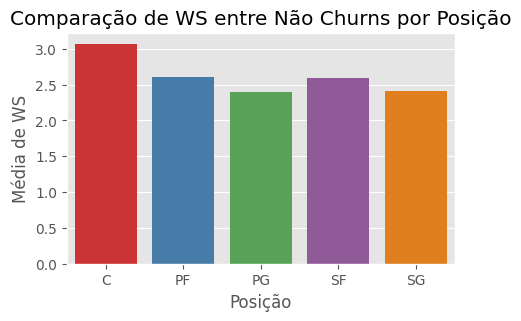

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir a ordem das posições
pos_order = ['C', 'PF', 'PG', 'SF', 'SG']

# Filtrar os dados para churns e não churns
churn_data = novo_data[novo_data['Churn'] == 1]
no_churn_data = novo_data[novo_data['Churn'] == 0]

# Criar gráfico de barras para comparar o WS entre churns e não churns
plt.figure(figsize=(5, 3))
sns.barplot(data=churn_data, x='Pos', y='WS', order=pos_order, palette='Set1', ci=None)
plt.title('Comparação de WS entre Churns por Posição')
plt.xlabel('Posição')
plt.ylabel('Média de WS')
plt.show()

plt.figure(figsize=(5, 3))
sns.barplot(data=no_churn_data, x='Pos', y='WS', order=pos_order, palette='Set1', ci=None)
plt.title('Comparação de WS entre Não Churns por Posição')
plt.xlabel('Posição')
plt.ylabel('Média de WS')
plt.show()
